In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
import astropy as ap
import time

In [2]:
pi = np.pi
earth_mass = 5.972*(10**24) # Earth Mass, kg
earth_rotation = 23.9333 # Earth Rotation Period, hours
earth_orbit = 365.2422 # Earth Orbital Period, days
earth_radius = 6378 # Earth Radius, km
angle = (0)*pi/180 # angle from the level of the Moon-s orbit onto the earth. Input by erasing zero and making your angle in degrees. Subtract 23.5 to get your lattitude on Earth.
G = 6.67428*(10**-11) # N*m^2/kg^2
g = 9.81 # m/s^2 

moon_radius = 1734 # km
moon_mass = 7.348*(10**22) # Moon Mass, kg
moon_orbit = 27.2917 # Moon Orbital Period, days
moon_apogee = 405696 # Earth-Center-Moon Apogee, km
moon_perigee = 363300 # Earth-Center-Moon Perigee, km

sun_radius = 696340 # km
sun_mass = 1.989*(10**30) # Sun Mass, kg
earth_aphelion = 152097701 # Earth-Sun Aphelion, km
earth_perihelion = 147098074 # Earth-Sun Perihelion, km

earth_sun_amplitude =  (earth_aphelion-earth_perihelion)/(2) # Earth-Sun Amplitude, km
earth_moon_amplitude =  (moon_apogee-moon_perigee)/(2) # Earth-Moon Amplitude, km

# alloted_time = earth_rotation
# alloted_time = earth_rotation*earth_orbit
alloted_time = earth_rotation*30

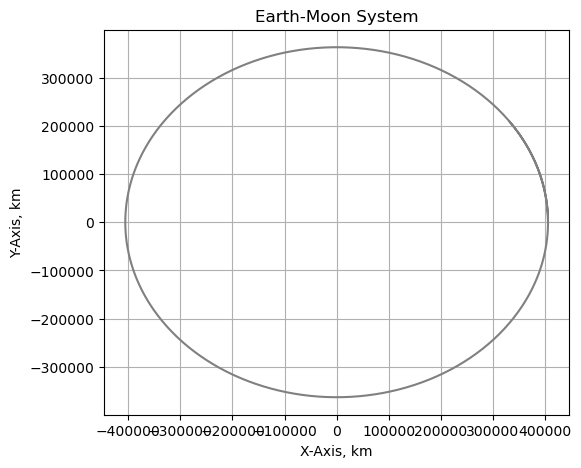

In [3]:
t = np.arange(0,alloted_time)
earth_moon_distanceX = (moon_apogee)*np.cos((2*pi*t)/(earth_rotation*moon_orbit)) # X component of Earth-Moon distance
earth_moon_distanceY = (moon_perigee)*np.sin((2*pi*t)/(earth_rotation*moon_orbit)) # Y component of Earth-Moon distance
earth_moon_distance = (((earth_moon_distanceX)**2) + ((earth_moon_distanceY)**2))**0.5 #+ ((earth_radius*np.cos((2*(pi)*t)/(earth_rotation))))# + (earth_radius*np.sin((2*(pi)*t)/(earth_rotation))))*np.cos(angle)# Earth-Center-Moon Distance

plt.figure(figsize=(6,5))
plt.plot(earth_moon_distanceX, earth_moon_distanceY, color="grey", label="Moon Orbit")
plt.xlabel("X-Axis, km")
plt.ylabel("Y-Axis, km")
plt.title("Earth-Moon System")
plt.grid()
plt.show()

In [14]:
# fig, ax = plt.subplots()
# line, = ax.plot(earth_moon_distanceX, earth_moon_distanceY)
# def update(frame):
#     line.set_ydata(np.sin(x + frame / 10.0))
#     return line, 

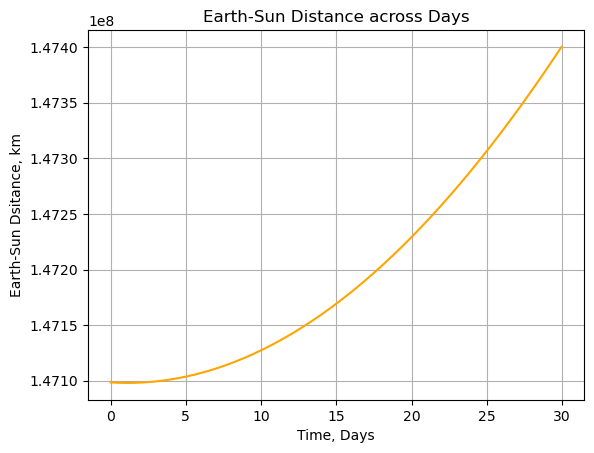

In [5]:
earth_sun_distance = (earth_sun_amplitude)*np.cos((2*(pi)*t)/(earth_rotation*earth_orbit) + pi - ((2*pi)/(earth_rotation*14))) + (earth_aphelion-earth_sun_amplitude) 
# The Sun does exert some tides on the Earth, so it will be helpful here. Measures the start of the year (two weeks before perihelion)

plt.figure()
plt.plot(t/earth_rotation, earth_sun_distance, color='orange')
plt.xlabel("Time, Days")
plt.ylabel("Earth-Sun Dsitance, km")
plt.title("Earth-Sun Distance across Days")
plt.grid()
plt.show()

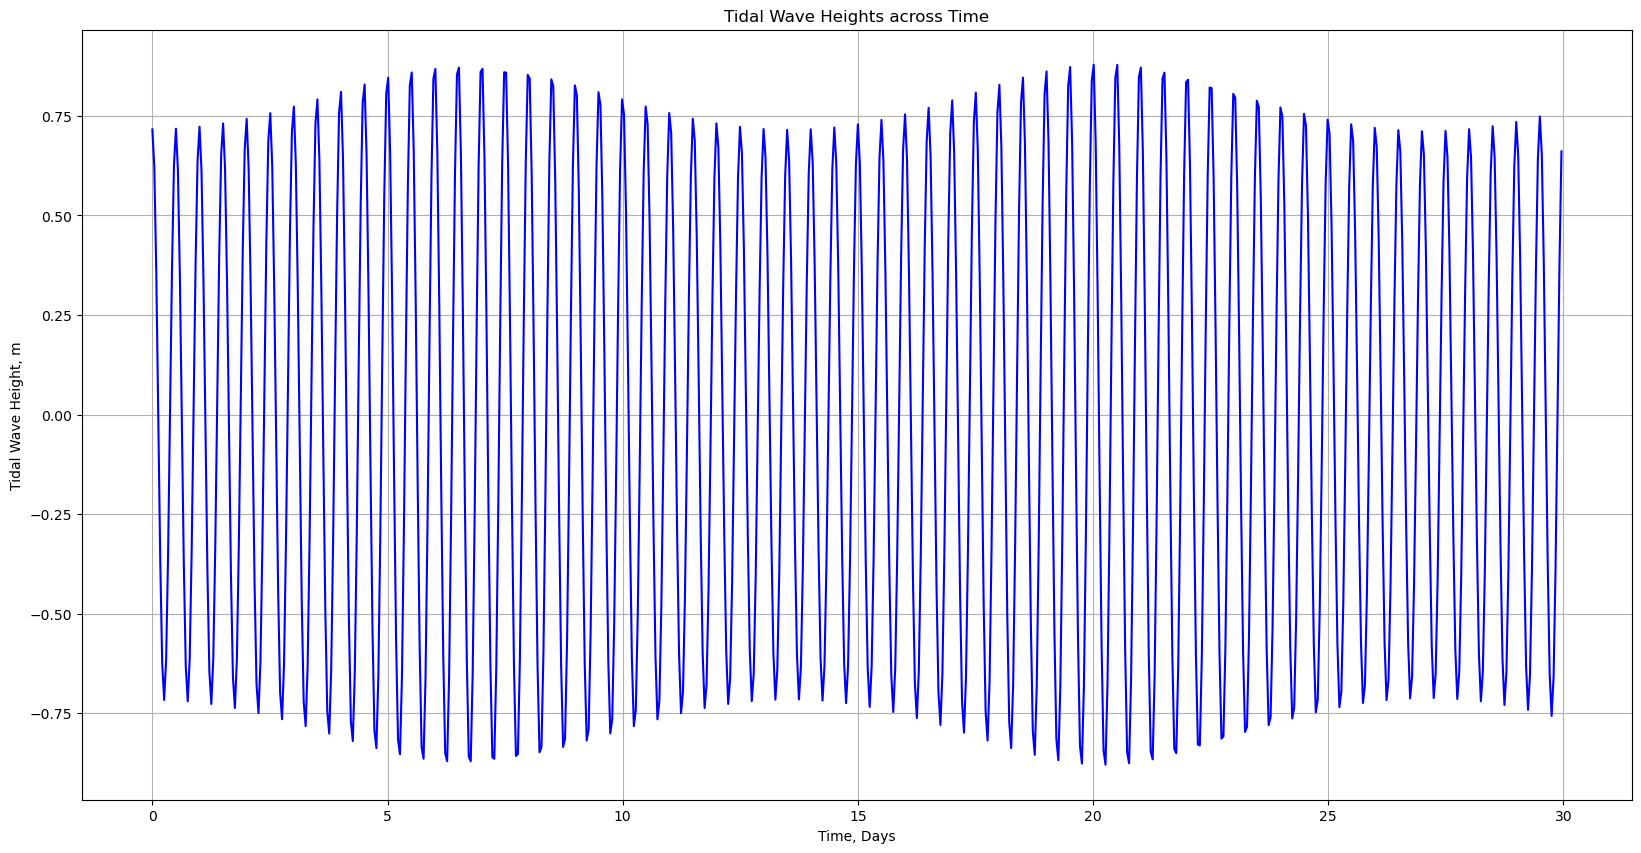

In [6]:
def tide_moon(t):
    return ((3*G*moon_mass*((earth_radius*1000)**2))/(2*g*((earth_moon_distance*1000)**3)))*np.cos((4*(pi)*t)/(earth_rotation))*np.cos(angle)
tidal_wave_height_by_moon = tide_moon(t)

def tide_sun(t):
    return ((3*G*sun_mass*((earth_radius*1000)**2))/(2*g*((earth_sun_distance*1000)**3)))*np.cos((4*(pi)*t)/(earth_rotation))*np.cos(angle)
tidal_wave_height_by_sun = tide_sun(t)

# psi = np.arctan(earth_moon_distanceY/earth_moon_distanceX)

def tides(t):
    return tidal_wave_height_by_moon  + tidal_wave_height_by_sun
tidal_wave_height = tides(t)

plt.figure(figsize=(20,10))
plt.plot(t/earth_rotation, tidal_wave_height, color="blue")
plt.xlabel("Time, Days")
plt.ylabel("Tidal Wave Height, m")
plt.title("Tidal Wave Heights across Time")
plt.grid()
plt.show()

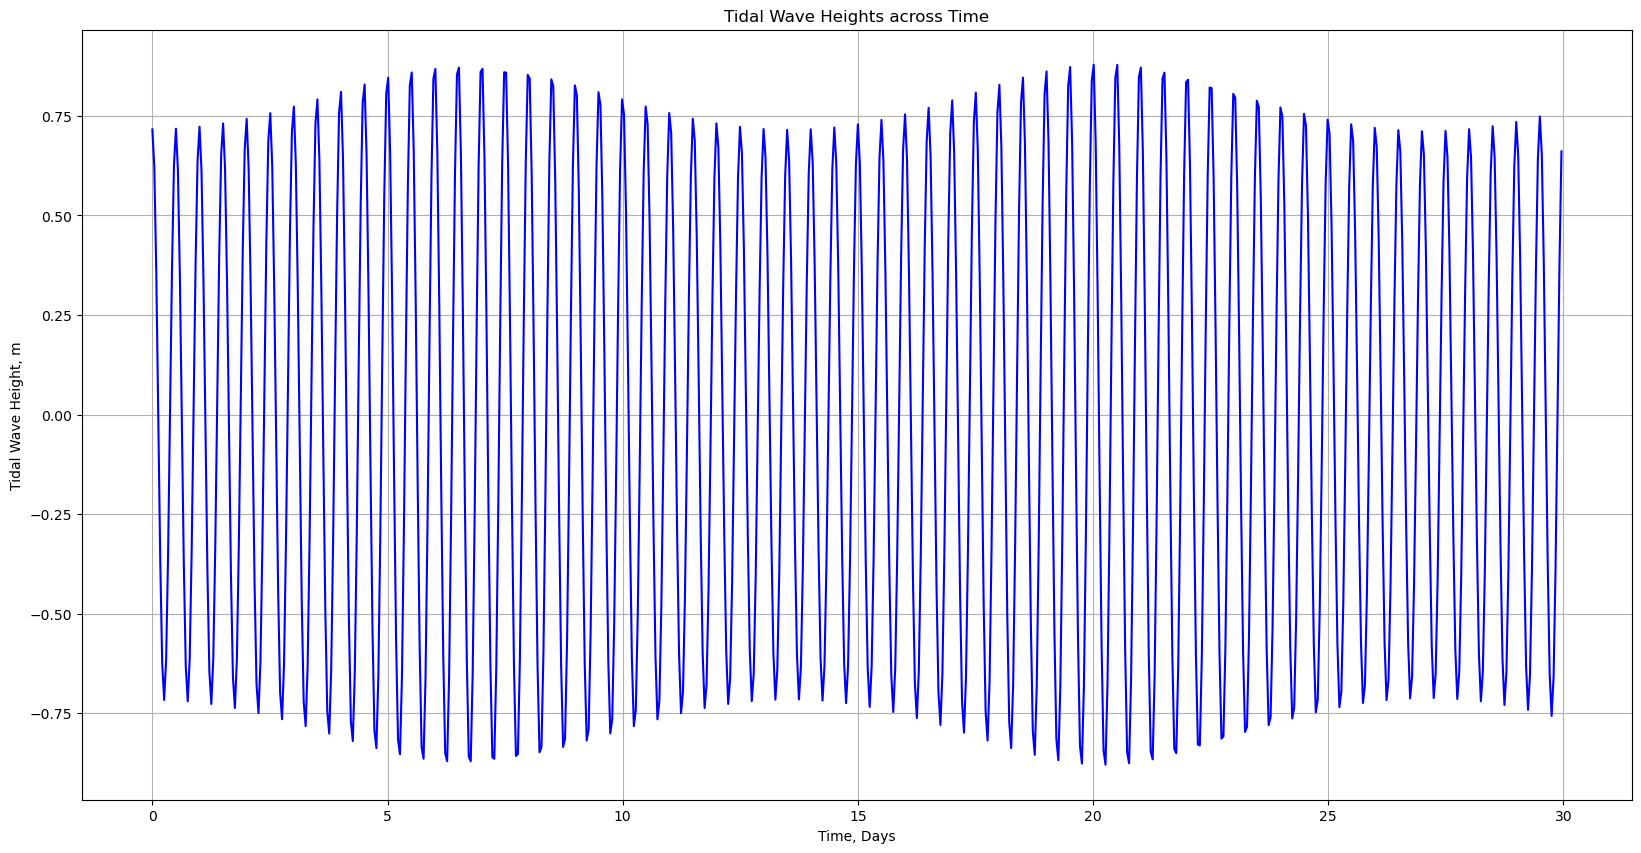

In [10]:
def init():
    plt.set_xlim(len(t))
    plt.set_ylim(tidal_wave_height)
    return line


fig, ax = plt.subplots(figsize=(20,10))
line, = ax.plot(t/earth_rotation, tidal_wave_height, color="blue")
ax.set_xlabel("Time, Days")
ax.set_ylabel("Tidal Wave Height, m")
ax.set_title("Tidal Wave Heights across Time")
ax.grid()
def update(frame):
    line.set_ydata(tides(t + frame / 10.0))
    return line,

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)
# ani = animation.FuncAnimation(fig, update, frames=1000, init_func = init, blit=True)

ani.save("tides5.gif", writer="pillow", fps=20)

In [4]:
# #Titan-Saturn System

# titan_mass = 1.35*(10**23) # kg
# titan_rotation = earth_rotation*15.9 # hours
# titan_radius = 2575 # km
# titan_angle = (0)*pi/180
# titan_g = (G*titan_mass)/((titan_radius*1000)**2) # m/s^2 

# Saturn_mass = (5.683)*(10**26) # kg
# titan_Saturn_distance = 1200000 # km
# titan_orbit = titan_rotation #(((4*(pi**2)*(((planet2_star_distance)*1000)**2))/(G*(star2_mass+planet2_mass)))**1/2)/10 # days

# alloted_time = titan_orbit

In [3]:
# titan_wave = ((3*G*Saturn_mass*((titan_radius*1000)**2))/(2*titan_g*((titan_Saturn_distance*1000)**3)))*np.cos((2*(pi)*t)/(titan_rotation))*np.cos(angle)

# plt.figure(figsize=(20,10))
# plt.plot(t/earth_rotation, titan_wave, color="orange")
# plt.plot(t/earth_rotation, tidal_wave_height, color="blue")
# plt.xlabel("Time, Days")
# plt.ylabel("Tidal Wave Height, m")
# plt.title("Tidal Wave Heights across Time")
# plt.grid()
# plt.show()

# #Graph should be a flat line since Titan is actually tidally locked with Saturn. Fix the dimension issue

In [2]:
# #Gargantua-Miller's Planet System

# planet2_mass = 7.76*(10**24) # kg
# planet2_rotation = 23.9333 # hours
# planet2_radius = 6378 # km
# planet2_angle = (0)*pi/180
# planet2_g = (G*planet2_mass)/((planet2_radius*1000)**2) # m/s^2 

# star2_mass = (1.989*(10**30))*(10**8) # kg
# planet2_star_distance = 150000000 # km
# planet2_orbit = (((4*(pi**2)*(((planet2_star_distance)*1000)**2))/(G*(star2_mass+planet2_mass)))**1/2)/10 # days

# # alloted_time = planet2_orbit

In [1]:
# tidal_wave = ((3*G*star2_mass*((planet2_radius*1000)**2))/(2*planet2_g*((planet2_star_distance*1000)**3)))*np.cos((2*(pi)*t)/(planet2_rotation))*np.cos(angle)

# plt.figure(figsize=(20,10))
# plt.plot(t/earth_rotation, tidal_wave/1000, color="black")
# plt.plot(t/earth_rotation, titan_wave/1000, color="orange")
# # plt.plot(t/earth_rotation, tidal_wave_height, color="blue")
# plt.xlabel("Time, Days")
# plt.ylabel("Tidal Wave Height, km")
# plt.title("Tidal Wave Heights across Time")
# plt.grid()
# plt.show()

#Those certaintly aren't mountains, although their heights are pretty similar!